### calculate R_LH0, R_LH, R_FH and R_ROD

In [112]:
import pandas as pd
import numpy as np
import pandas_ta as ta

In [113]:
# read data
df = pd.read_csv("/Users/luzhang/Desktop/data/AAPL.csv")
df = pd.DataFrame(df)
# drop nas
df = df.dropna()

In [115]:
# data pre-cessing
#change sereis to datetime format
df['time']=pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

In [116]:
# Define Drop outlier day function to drop the incomplete transcation days
def DropOutlierday(data):
    # subset dataframe such that it only contains the complete transcation
    totalDay=pd.to_datetime(data.index.date).unique()
    completeDay=totalDay[day_keep]

    outlierday=totalDay.difference(completeDay)
    data['date'] = [d.date() for d in data.index]

    outlierday=outlierday.strftime('%Y-%m-%d')
    t=pd.DataFrame()
    
    for i in range(len(outlierday)):
        temp=pd.DataFrame(data['date'].loc[outlierday[i]])
        t=t.append(temp)
    
    data = data.drop(t.index) # drop the outlier day
    data = data.drop('date',1) # delete columne 'date'
    return data

##### R_LH0 and R_LH 

In [117]:
#subset df to calculate LH and LH0 
df_LH_LH0 = df[((df.index.hour == 15) & (df.index.minute == 30))|
        ((df.index.hour == 16) & (df.index.minute == 0))]
#df_LH_LH0

In [118]:
# find the complete transaction
rows_eachday = df_LH_LH0.groupby(df_LH_LH0.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2604

In [119]:
df_LH_LH0 = DropOutlierday(df_LH_LH0)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/230705463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/230705463.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [120]:
#df_LH_LH0

In [121]:
df_LH_LH0['returns'] = df_LH_LH0['close'].pct_change();
#df_LH_LH0

In [122]:
df_LH = df_LH_LH0[((df_LH_LH0.index.hour == 16) & (df_LH_LH0.index.minute == 0))]
df_LH = df_LH.drop(['open','high','low','close','volume'],1)
df_LH = df_LH.rename(columns={"returns":"R_LH"})
df_LH

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/2187624823.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_LH = df_LH.drop(['open','high','low','close','volume'],1)


,R_LH
time,
2008-01-02 16:00:00,0.003707
2008-01-03 16:00:00,0.005210
2008-01-04 16:00:00,-0.015808
2008-01-07 16:00:00,0.016253
2008-01-08 16:00:00,-0.019919
...,...
2018-05-24 16:00:00,-0.000796
2018-05-25 16:00:00,-0.000689
2018-05-29 16:00:00,0.003174


In [123]:
df_LH0=df_LH.shift()
df_LH0=df_LH0.rename(columns={'R_LH':'R_LH0'})
df_LH0

,R_LH0
time,
2008-01-02 16:00:00,NaN
2008-01-03 16:00:00,0.003707
2008-01-04 16:00:00,0.005210
2008-01-07 16:00:00,-0.015808
2008-01-08 16:00:00,0.016253
...,...
2018-05-24 16:00:00,0.002287
2018-05-25 16:00:00,-0.000796
2018-05-29 16:00:00,-0.000689


##### R_ROD

In [124]:
#subset df to calculate ROD
df_ROD = df[((df.index.hour == 15) & (df.index.minute == 30))|
        ((df.index.hour == 16) & (df.index.minute == 0))]
#df_ROD

In [125]:
# find the complete transaction
rows_eachday = df_ROD.groupby(df_ROD.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2604

In [126]:
df_ROD  = DropOutlierday(df_ROD)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/230705463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/230705463.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [127]:
df_ROD['returns'] = df_ROD['close'].pct_change();
#df_ROD

In [128]:
df_ROD=df_ROD[((df_ROD.index.hour == 15) & (df_ROD.index.minute == 30))]
df_ROD=df_ROD.drop(['open','high','low','close','volume'],1)
df_ROD=df_ROD.rename(columns={'returns':'R_ROD'})
df_ROD

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/3208359948.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ROD=df_ROD.drop(['open','high','low','close','volume'],1)


,R_ROD
time,
2008-01-02 15:30:00,NaN
2008-01-03 15:30:00,-0.005592
2008-01-04 15:30:00,-0.061740
2008-01-07 15:30:00,-0.028845
2008-01-08 15:30:00,-0.016162
...,...
2018-05-24 15:30:00,-0.000478
2018-05-25 15:30:00,0.002657
2018-05-29 15:30:00,-0.006970


### R_ON

In [129]:
df_ON=df[((df.index.hour == 9) & (df.index.minute == 31))|
        ((df.index.hour == 16) & (df.index.minute == 0))]
# Larry: 9:31 is the data for the first minute which is better than using the data for 9:29~9:30
df_ON

,open,high,low,close,volume
time,,,,,
2008-01-02 09:31:00,199.30,199.4900,198.78,199.0750,351557
2008-01-02 16:00:00,195.09,195.1200,194.93,194.9300,221730
2008-01-03 09:31:00,195.45,195.5000,194.92,195.1588,257156
2008-01-03 16:00:00,194.74,194.9900,194.65,194.8500,168599
2008-01-04 09:31:00,191.44,191.5200,191.07,191.1500,490640
...,...,...,...,...,...
2018-05-29 16:00:00,187.90,187.9400,187.71,187.8600,303509
2018-05-30 09:31:00,187.64,188.0000,187.64,187.7950,287897
2018-05-30 16:00:00,187.65,187.6600,187.41,187.5000,457386


In [130]:
rows_eachday = df_ON.groupby(df_ON.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2609

In [131]:
df_ON  = DropOutlierday(df_ON)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/230705463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/230705463.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [132]:
df_ON['close_pre'] = df_ON['close'].shift()

In [133]:
df_ON = df_ON[((df_ON.index.hour == 9) & (df_ON.index.minute == 31))]

In [134]:
df_ON['R_ON'] = df_ON['open']/df_ON['close_pre']-1;
df_ON = df_ON.drop(["open","high","low","close","volume","close_pre"],1)
df_ON

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/2589525367.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ON = df_ON.drop(["open","high","low","close","volume","close_pre"],1)


,R_ON
time,
2008-01-02 09:31:00,NaN
2008-01-03 09:31:00,0.002668
2008-01-04 09:31:00,-0.017501
2008-01-07 09:31:00,0.007058
2008-01-08 09:31:00,0.013909
...,...
2018-05-24 09:31:00,0.001698
2018-05-25 09:31:00,0.000106
2018-05-29 09:31:00,-0.005197


### R_FH

In [135]:
df_FH = df[((df.index.hour == 9) & (df.index.minute == 31))|
        ((df.index.hour == 10) & (df.index.minute == 0))]
# Larry: use 9:31 data
#df_FH

In [136]:
rows_eachday = df_FH.groupby(df_FH.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2622

In [137]:
df_FH = DropOutlierday(df_FH)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/230705463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/230705463.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [138]:
df_FH

,open,high,low,close,volume
time,,,,,
2008-01-02 09:31:00,199.30,199.4900,198.78,199.0750,351557
2008-01-02 10:00:00,200.00,200.2100,199.99,200.1600,181005
2008-01-03 09:31:00,195.45,195.5000,194.92,195.1588,257156
2008-01-03 10:00:00,194.66,194.6600,194.40,194.5500,73878
2008-01-04 09:31:00,191.44,191.5200,191.07,191.1500,490640
...,...,...,...,...,...
2018-05-29 10:00:00,188.24,188.4300,188.22,188.3500,81980
2018-05-30 09:31:00,187.64,188.0000,187.64,187.7950,287897
2018-05-30 10:00:00,187.13,187.1600,187.06,187.1200,58965


In [139]:
df_FH['open_pre30']=df_FH['open'].shift()

In [140]:
df_FH=df_FH[(df_FH.index.hour==10)&(df_FH.index.minute==0)]
df_FH

,open,high,low,close,volume,open_pre30
time,,,,,,
2008-01-02 10:00:00,200.00,200.21,199.99,200.1600,181005,199.30
2008-01-03 10:00:00,194.66,194.66,194.40,194.5500,73878,195.45
2008-01-04 10:00:00,191.28,191.41,191.07,191.2100,67849,191.44
2008-01-07 10:00:00,182.86,183.10,182.60,182.6400,148512,181.20
2008-01-08 10:00:00,179.02,179.44,178.87,179.4200,136202,180.05
...,...,...,...,...,...,...
2018-05-24 10:00:00,187.13,187.30,186.95,187.1700,94751,188.77
2018-05-25 10:00:00,188.50,188.51,188.45,188.4542,24791,188.23
2018-05-29 10:00:00,188.24,188.43,188.22,188.3500,81980,187.60


In [141]:
df_FH['R_FH'] = df_FH['open']/df_FH['open_pre30']-1
df_FH = df_FH.drop(["open","high","low","close","open_pre30",'volume'],1)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/1210239203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FH['R_FH'] = df_FH['open']/df_FH['open_pre30']-1
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/1210239203.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_FH = df_FH.drop(["open","high","low","close","open_pre30",'volume'],1)


In [142]:
df_FH

,R_FH
time,
2008-01-02 10:00:00,0.003512
2008-01-03 10:00:00,-0.004042
2008-01-04 10:00:00,-0.000836
2008-01-07 10:00:00,0.009161
2008-01-08 10:00:00,-0.005721
...,...
2018-05-24 10:00:00,-0.008688
2018-05-25 10:00:00,0.001434
2018-05-29 10:00:00,0.003412


### R_ONFH

In [143]:
df_ONFH = df[((df.index.hour==16)&(df.index.minute==0))|
            ((df.index.hour==10)&(df.index.minute==0))]
df_ONFH

,open,high,low,close,volume
time,,,,,
2008-01-02 10:00:00,200.00,200.2100,199.99,200.16,181005
2008-01-02 16:00:00,195.09,195.1200,194.93,194.93,221730
2008-01-03 10:00:00,194.66,194.6600,194.40,194.55,73878
2008-01-03 16:00:00,194.74,194.9900,194.65,194.85,168599
2008-01-04 10:00:00,191.28,191.4100,191.07,191.21,67849
...,...,...,...,...,...
2018-05-29 16:00:00,187.90,187.9400,187.71,187.86,303509
2018-05-30 10:00:00,187.13,187.1600,187.06,187.12,58965
2018-05-30 16:00:00,187.65,187.6600,187.41,187.50,457386


In [144]:
rows_eachday = df_ONFH.groupby(df_ONFH.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2609

In [145]:
df_ONFH = DropOutlierday(df_ONFH)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/230705463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/230705463.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [146]:
df_ONFH['close_preday']=df_ONFH['close'].shift()

In [147]:
df_ONFH=df_ONFH[((df_ONFH.index.hour==10)&(df_ONFH.index.minute==0))]
df_ONFH['R_ONFH']=df_ONFH['open']/df_ONFH['close_preday']-1
df_ONFH = df_ONFH.drop(['open','high','low','close','volume','close_preday'],1)
df_ONFH

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/3133853775.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_ONFH = df_ONFH.drop(['open','high','low','close','volume','close_preday'],1)


,R_ONFH
time,
2008-01-02 10:00:00,NaN
2008-01-03 10:00:00,-0.001385
2008-01-04 10:00:00,-0.018322
2008-01-07 10:00:00,0.016284
2008-01-08 10:00:00,0.008109
...,...
2018-05-24 10:00:00,-0.007005
2018-05-25 10:00:00,0.001541
2018-05-29 10:00:00,-0.001803


### R_M

In [148]:
df_M = df[((df.index.hour==10)&(df.index.minute==0)) |
         ((df.index.hour==15)&(df.index.minute==0))]
df_M

,open,high,low,close,volume
time,,,,,
2008-01-02 10:00:00,200.000,200.2100,199.990,200.16,181005
2008-01-02 15:00:00,194.460,194.4900,194.000,194.12,155092
2008-01-03 10:00:00,194.660,194.6600,194.400,194.55,73878
2008-01-03 15:00:00,195.390,195.5200,195.330,195.51,30833
2008-01-04 10:00:00,191.280,191.4100,191.070,191.21,67849
...,...,...,...,...,...
2018-05-29 15:00:00,187.240,187.2899,187.134,187.14,32975
2018-05-30 10:00:00,187.130,187.1600,187.060,187.12,58965
2018-05-30 15:00:00,187.525,187.5500,187.510,187.54,18874


In [149]:
rows_eachday = df_M.groupby(df_M.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2608

In [150]:
df_M = DropOutlierday(df_M)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/230705463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/230705463.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [151]:
df_M['open_past30'] = df_M['open'].shift()
df_M = df_M[((df_M.index.hour==15)&(df_M.index.minute==0))]
df_M['R_M'] = df_M['close']/df_M['open_past30']-1
df_M = df_M.drop(['open','high','low','close','open_past30','volume'],1)
#df_M

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/3777036572.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_M = df_M.drop(['open','high','low','close','open_past30','volume'],1)


### R_SLH

In [152]:
df_SLH = df[((df.index.hour==15)&(df.index.minute==30)) |
           ((df.index.hour==15)&(df.index.minute==0))]

In [153]:
rows_eachday = df_SLH.groupby(df_SLH.index.date).size().values
day_keep = [True if x==2 else False for x in rows_eachday]
sum(day_keep)

2602

In [154]:
df_SLH = DropOutlierday(df_SLH)

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/230705463.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = [d.date() for d in data.index]
/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/230705463.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop('date',1) # delete columne 'date'


In [155]:
df_SLH['close_pre60'] = df_SLH['close'].shift()
df_SLH = df_SLH[((df_SLH.index.hour==15)&(df_SLH.index.minute==30))]
df_SLH['R_SLH'] = df_SLH['close']/df_SLH['close_pre60']-1
df_SLH = df_SLH.drop(['open','high','low','close','volume','close_pre60'],1)
df_SLH

/var/folders/46/kfpb_pwn1kv8zw9fmn8kgbrr0000gn/T/ipykernel_59892/17277474.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_SLH = df_SLH.drop(['open','high','low','close','volume','close_pre60'],1)


,R_SLH
time,
2008-01-02 15:30:00,0.000464
2008-01-03 15:30:00,-0.008542
2008-01-04 15:30:00,-0.007600
2008-01-07 15:30:00,-0.005237
2008-01-08 15:30:00,-0.020519
...,...
2018-05-24 15:30:00,0.000983
2018-05-25 15:30:00,0.000481
2018-05-29 15:30:00,0.000671


In [156]:
# keep the date and ignore the time
df_LH['new_date'] = [d.date() for d in df_LH.index]
df_LH0['new_date'] = [d.date() for d in df_LH0.index]
df_ROD['new_date'] = [d.date() for d in df_ROD.index]
df_ON['new_date'] = [d.date() for d in df_ON.index]
df_FH['new_date'] = [d.date() for d in df_FH.index]
df_ONFH['new_date'] = [d.date() for d in df_ONFH.index]
df_M['new_date'] = [d.date() for d in df_M.index]
df_SLH['new_date'] = [d.date() for d in df_SLH.index]

In [157]:
from functools import reduce

In [158]:
# merge by same date
data_frames=[df_LH, df_LH0, df_ROD, df_ON, df_FH, df_ONFH, df_M, df_SLH]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['new_date'],
                                            how='inner'), data_frames)

In [159]:
df_merged=df_merged.rename(columns={'new_date':'datetime'})

In [160]:
df_merged

,R_LH,datetime,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,0.003707,2008-01-02,NaN,NaN,NaN,0.003512,NaN,-0.029400,0.000464
1,0.005210,2008-01-03,0.003707,-0.005592,0.002668,-0.004042,-0.001385,0.004367,-0.008542
2,-0.015808,2008-01-04,0.005210,-0.061740,-0.017501,-0.000836,-0.018322,-0.036909,-0.007600
3,0.016253,2008-01-07,-0.015808,-0.028845,0.007058,0.009161,0.016284,-0.039374,-0.005237
4,-0.019919,2008-01-08,0.016253,-0.016162,0.013909,-0.005721,0.008109,-0.003631,-0.020519
...,...,...,...,...,...,...,...,...,...
2597,-0.000796,2018-05-24,0.002287,-0.000478,0.001698,-0.008688,-0.007005,0.005584,0.000983
2598,-0.000689,2018-05-25,-0.000796,0.002657,0.000106,0.001434,0.001541,0.000633,0.000481
2599,0.003174,2018-05-29,-0.000689,-0.006970,-0.005197,0.003412,-0.001803,-0.005844,0.000671
2600,0.001362,2018-05-30,0.003174,-0.003274,-0.001171,-0.002718,-0.003886,0.002191,-0.001573


In [161]:
df_merged=df_merged.set_index('datetime')

In [162]:
df_merged = df_merged.dropna()

In [163]:
df_merged.to_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum/Data/AAPL_Returns.csv", index=True)

### Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
uscore_returns = pd.read_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum/Data/AAPL_uscoreReturns.csv")
uscore_returns = uscore_returns.drop(uscore_returns.columns[0],axis=1)
uscore_returns

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,0.934448,0.893695,0.298539,0.596501,0.230104,0.382353,0.704537,0.020569
1,0.009804,0.934448,0.004421,0.034025,0.434256,0.050557,0.008266,0.026336
2,0.991349,0.009804,0.047097,0.811803,0.907920,0.924068,0.006728,0.061707
3,0.006344,0.991349,0.126682,0.937908,0.163975,0.764898,0.310073,0.000961
4,0.998654,0.006344,0.889466,0.521530,0.948289,0.879854,0.650711,0.929835
...,...,...,...,...,...,...,...,...
2596,0.375433,0.797193,0.455786,0.541522,0.085928,0.182045,0.740677,0.694925
2597,0.391580,0.374664,0.556901,0.444637,0.580354,0.509996,0.530757,0.608035
2598,0.863322,0.390427,0.265475,0.187812,0.698385,0.365436,0.242407,0.644560
2599,0.706459,0.862553,0.365821,0.365821,0.308920,0.282776,0.614571,0.253556


In [22]:
from scipy.stats import norm
nscoreReturns = norm.ppf(uscore_returns)# normalized the u-scored returns

In [26]:
nscoreReturns = pd.DataFrame(nscoreReturns, columns = uscore_returns.columns)
nscoreReturns = pd.DataFrame(nscoreReturns)
#sns.pairplot(nscoreReturns)

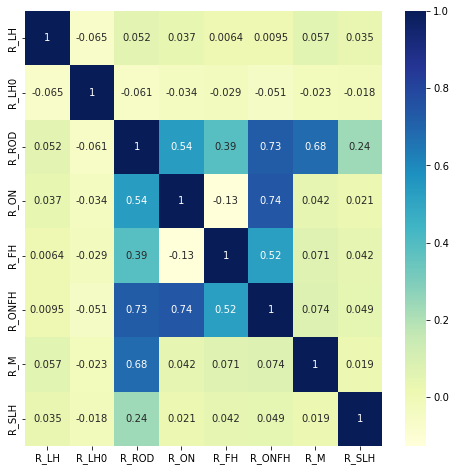

In [30]:
# heatmap to know the correlation better
# visualizing the data using heatmap
plt.figure(figsize=(8,8))
sns.heatmap(nscoreReturns.corr(),cmap='YlGnBu',annot=True)
plt.show()

In [29]:
nscoreReturns.to_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum/Data/AAPL_nscoreReturns.csv", index=True)

### Linear Regression

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [14]:
returns = pd.read_csv("/Users/luzhang/Documents/GitHub/WrappingUp_Exploring_Intraday_Momentum/Data/AAPL_nscoreReturns.csv")

In [15]:
returns.head()

,R_LH,R_LH0,R_ROD,R_ON,R_FH,R_ONFH,R_M,R_SLH
0,1.509765,1.246419,-0.528607,0.244302,-0.738505,-0.299307,0.537494,-2.042136
1,-2.333769,1.509765,-2.618074,-1.824671,-0.165549,-1.639472,-2.396952,-1.937600
2,2.380247,-2.333769,-1.673675,0.884561,1.328055,1.432976,-2.471457,-1.540600
3,-2.492425,2.380247,-1.142216,1.537451,-0.978250,0.722148,-0.495643,-3.101976
4,3.000963,-2.492425,1.223691,0.053994,1.628487,1.174257,0.387241,1.474561


In [16]:
y = returns.R_LH

In [17]:
X = returns[returns.columns[1:8]]

In [18]:
lr_full = sm.OLS(y,X).fit()

In [19]:
lr_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   R_LH   R-squared (uncentered):                   0.020
Model:                            OLS   Adj. R-squared (uncentered):              0.018
Method:                 Least Squares   F-statistic:                              7.631
Date:                Fri, 01 Apr 2022   Prob (F-statistic):                    3.84e-09
Time:                        09:42:20   Log-Likelihood:                         -3663.5
No. Observations:                2601   AIC:                                      7341.
Df Residuals:                    2594   BIC:                                      7382.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
R_LH0         -0.0629      0.019     -3.226      0.001      -0.101      -0.025
R_ROD          0.1228      0.098      1.258      0.209      -0.069       0.314
R_ON           0.3712      0.067      5.538      0.000       0.240       0.503
R_FH           0.2644      0.053      4.997      0.000       0.161       0.368
R_ONFH        -0.4951      0.107     -4.637      0.000      -0.704      -0.286
R_M           -0.0266      0.064     -0.413      0.680      -0.153       0.100
R_SLH          0.0105      0.027      0.389      0.698      -0.042       0.064
==============================================================================
Omnibus:                        0.442   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.802   Jarque-Bera (JB):                0.449
Skew:                           0.032   Prob(JB):                        0.799
Kurtosis:                       2.990   Cond. No.                         12.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""